In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Checking the day year and month columns

In [15]:
df[~df['day'].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [16]:
df.drop([122,123],axis='rows',inplace=True)

In [17]:
df[~df['year'].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [18]:
df[~df['month'].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [19]:
df['day']=df['day'].astype(int)
df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)

### Fixing Temperature RH Ws Rain columns

In [20]:
df['Temperature']=df['Temperature'].astype(int)

In [21]:
df[~df[' RH'].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


### Fixing spaces in the  column names 

In [22]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [23]:
df.columns=list(df.columns.str.strip()) # This will strip all the spaces from the column names 

In [24]:
df[~df['Ws'].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [25]:
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(int)

In [26]:
df[~df['Rain'].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
12,13,6,2012,27,84,21,1.2,50,6.7,17,0.5,6.7,0.2,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,20,9,2012,34,58,13,0.2,79.5,18.7,88,2.1,24.4,3.8,not fire
242,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


Meaning rain column as decimals so we will convert it into float type

In [27]:
df['Rain']=df['Rain'].astype(float)

### Fixing FFMC,DMC,DC,ISI,BUI,FWI columns

In [28]:
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [29]:
df['DC'].replace('14.6 9','14.6',inplace=True)

In [30]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [31]:
l1=['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', '0', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
       '15.2', '6.5']

In [32]:
l1_numeric=[float(x) for x in l1]

In [33]:
np.mean(l1_numeric)

10.502362204724411

In [34]:
df['FWI'].replace('fire   ','10.50',inplace=True)

In [35]:
for i in ['FFMC','DMC','DC','ISI','BUI','FWI']:
    df[f'{i}']=df[f'{i}'].astype(float)
    print(i)

FFMC
DMC
DC
ISI
BUI
FWI


### Fixing classes column removing spaces and nan values 

In [36]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [37]:
df['Classes']=df['Classes'].str.strip()

In [38]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [39]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6,12.5,10.4,10.5,NaN


In [40]:
df['Classes']=df['Classes'].fillna(value=df['Classes'].mode()[0])

In [41]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [42]:
df_fixed=pd.concat([df,pd.get_dummies(df['Classes'])],axis='columns')

In [43]:
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  fire         244 non-null    uint8  
 15  not fire     244 non-null    uint8  
dtypes: float64(7), int64(6), object(1), uint8(2)
memory usage: 29.1+ KB


### Fixing Multicollinearity 
* removing columns that are highly related to each other like 80 percent related 

In [44]:
df_fixed.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'fire', 'not fire'],
      dtype='object')

In [45]:
corr=df_fixed[['RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']].corr()

In [46]:
corr

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
RH,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.580536
Ws,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.034005
Rain,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324762
FFMC,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.691455
DMC,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875161
DC,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.736982
ISI,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.919486
BUI,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.856399
FWI,-0.580536,0.034005,-0.324762,0.691455,0.875161,0.736982,0.919486,0.856399,1.000000


<AxesSubplot: >

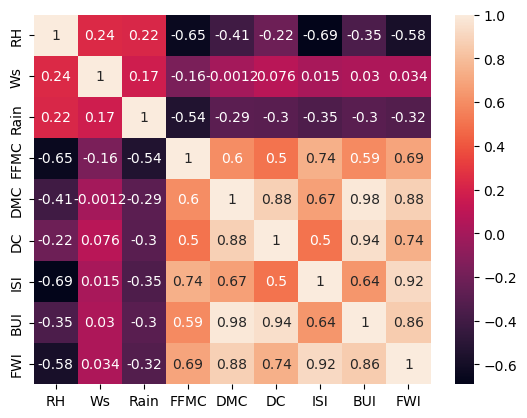

In [47]:
sns.heatmap(corr,annot=True)

In [48]:
corr.columns

Index(['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], dtype='object')

### Removing columns that have correlation of more than 80% either positive or negative 

In [49]:
indexes=[]
for j in range(0,9):
    for i in range(0,9):
        if corr.iloc[j,i]!=1.0 and np.abs(corr.iloc[j,i])>=0.80:
            indexes.append(f'{[corr.index[j],corr.columns[i]]},correlation={corr.iloc[j,i]}')

In [50]:
indexes

["['DMC', 'DC'],correlation=0.8753582639412613",
 "['DMC', 'BUI'],correlation=0.9820732709504009",
 "['DMC', 'FWI'],correlation=0.8751612837837772",
 "['DC', 'DMC'],correlation=0.8753582639412613",
 "['DC', 'BUI'],correlation=0.9419044789035811",
 "['ISI', 'FWI'],correlation=0.9194860889605078",
 "['BUI', 'DMC'],correlation=0.9820732709504009",
 "['BUI', 'DC'],correlation=0.9419044789035811",
 "['BUI', 'FWI'],correlation=0.8563994008640763",
 "['FWI', 'DMC'],correlation=0.8751612837837772",
 "['FWI', 'ISI'],correlation=0.9194860889605078",
 "['FWI', 'BUI'],correlation=0.8563994008640763"]

### we can keep DMC,ISI,FFMC,RAIN,Ws,HS
* DC,BUI,FWI WILL BE REMOVED 

### Month vs Classes 

<AxesSubplot: xlabel='Classes', ylabel='count'>

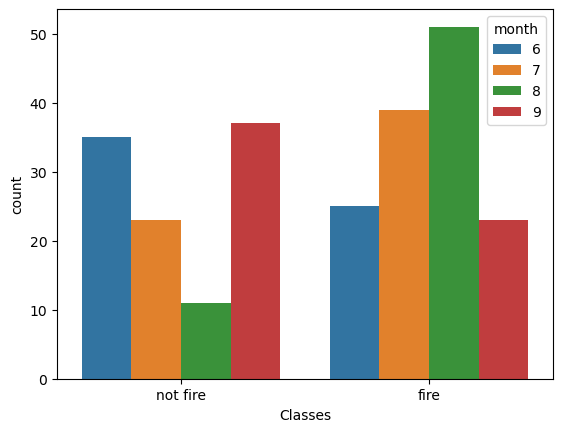

In [51]:
sns.countplot(x=df['Classes'],data=df,hue=df['month'])

### We are seeing most fires happpening in the month of August 

### Temperature ranges in months 

<AxesSubplot: xlabel='month', ylabel='Temperature'>

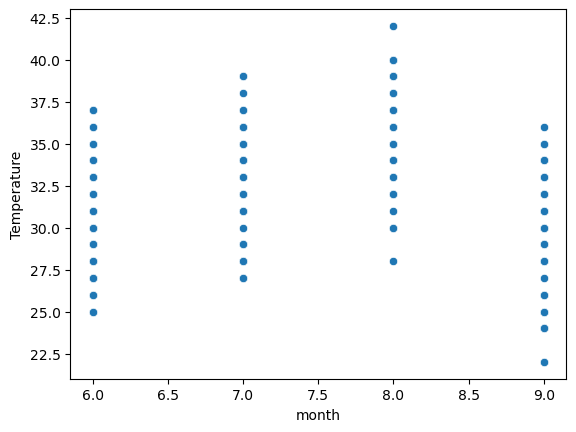

In [52]:
sns.scatterplot(data=df,x=df['month'],y=df['Temperature'])

### Rain vs Month 

<AxesSubplot: xlabel='month', ylabel='Rain'>

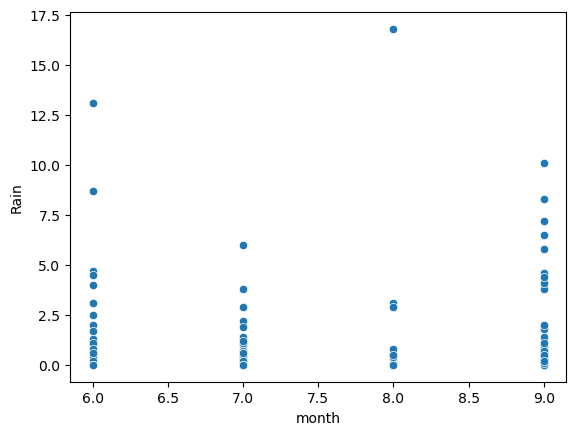

In [53]:
sns.scatterplot(data=df,x=df['month'],y=df['Rain'])

In [ ]:
sns.pairplot(df)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [56]:
df_fixed.drop('Classes',axis='columns',inplace=True)

In [57]:
x=df_fixed.drop('FWI',axis='columns')
y=df_fixed['FWI']

In [58]:
x.shape,y.shape

((244, 14), (244,))

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
x_train.shape,y_train.shape,x_test.shape,y_train.shape

((195, 14), (195,), (49, 14), (195,))

In [61]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Text(0.5, 1.0, 'Boxplot for x_test standardized')

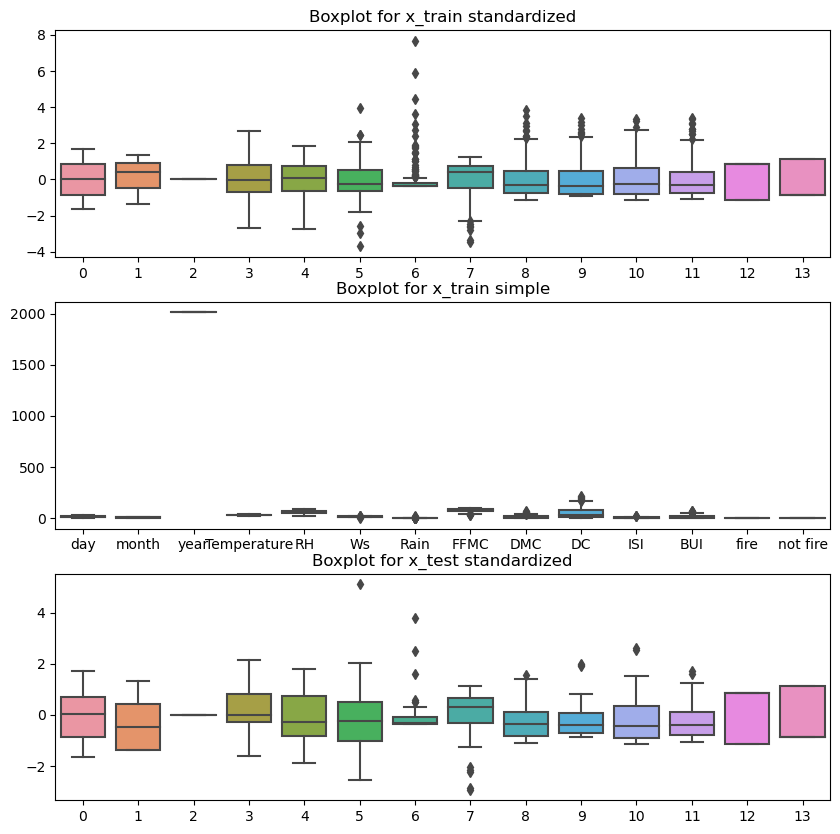

In [62]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=1,nrows=3,figsize=(10,10))
sns.boxplot(x_train_scaled,ax=ax1)
ax1.set_title('Boxplot for x_train standardized')
sns.boxplot(x_train,ax=ax2)
ax2.set_title('Boxplot for x_train simple')
sns.boxplot(x_test_scaled,ax=ax3)
ax3.set_title('Boxplot for x_test standardized')

### Trying Linear Regression 

In [63]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
lr.score(x_test_scaled,y_test)

0.98879166705833

In [64]:
y_pred=lr.predict(x_test)

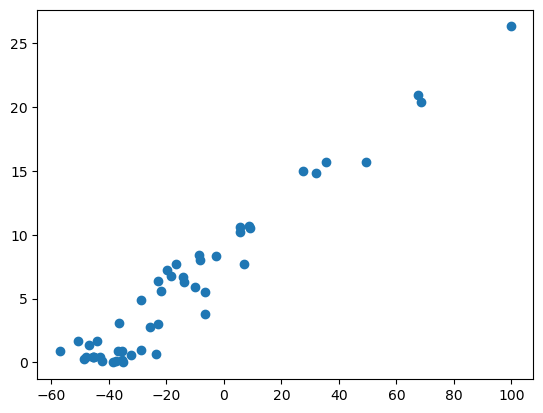

In [65]:
plt.scatter(y_pred,y_test)

### Trying lasso and Ridge and elastic net on our dataset

In [66]:
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
lasso.score(x_test_scaled,y_test)

0.9565960533931686

In [67]:
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
ridge.score(x_test_scaled,y_test)

0.987940915825893

In [68]:
elasticnet=ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
elasticnet.score(x_test_scaled,y_test)

0.8892455162177821

### Tryiyng ridge cross validation and lasso cross validation 

In [69]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [70]:
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
lassocv.score(x_test_scaled,y_test)

0.9884825332645042

In [71]:
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
ridgecv.score(x_test_scaled,y_test)

0.988759962274523

### pickling the model or saving the model 

In [72]:
# ridge cv model saved 
import pickle
with open('ridgecv.pkl','wb') as f:
    pickle.dump(ridgecv,f)

In [73]:
# Lasso cv model saved
pickle.dump(lassocv,open('lassocv.pkl','wb'))

In [75]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [2]:
! unzip 'forestfire-main.zip'

Archive:  forestfire-main.zip
b1af21c03d9077b62f3bf8fc38cfa2b8251dab00
   creating: forestfire-main/
   creating: forestfire-main/.ebextensions/
  inflating: forestfire-main/.ebextensions/python.config  
   creating: forestfire-main/.vscode/
  inflating: forestfire-main/.vscode/extensions.json  
  inflating: forestfire-main/.vscode/settings.json  
  inflating: forestfire-main/.vscode/tasks.json  
  inflating: forestfire-main/README.md  
  inflating: forestfire-main/application.py  
   creating: forestfire-main/dataset/
  inflating: forestfire-main/dataset/Algerian_forest_fires_cleaned_dataset.csv  
   creating: forestfire-main/models/
  inflating: forestfire-main/models/ridge.pkl  
  inflating: forestfire-main/models/scaler.pkl  
   creating: forestfire-main/notebooks/
  inflating: forestfire-main/notebooks/2.0-EDA And FE Algerian Forest Fires.ipynb  
  inflating: forestfire-main/notebooks/3.0-Model Training.ipynb  
 extracting: forestfire-main/requirements.txt  
   creating: forestfir

In [2]:
! pip install flask

In [1]:
from flask import Flask,request,render_template
import pandas as pd

In [4]:
import pickle 
model=pickle.load(open('lassocv.pkl','rb'))
scaler=pickle.load(open('scaler.pkl','rb'))

app=Flask(__name__)

@app.route('/')
def homepage():
    return render_template('index.html')

@app.route('/predict_datapoint',methods=['GET','POST']) # simply give both post and get here for error free execution 
def predictor(): # remember the name of the function should be same as the one mentioned in the template file for this function
    if request.method=='POST':
        day=int(request.form.get('day')) # get or simply .form can also be used 
        month=int(request.form.get('month'))
        year=int(request.form.get('year'))
        rh=int(request.form.get('RH'))
        ws=int(request.form.get('Ws'))
        rain=float(request.form.get('Rain'))
        ffmc=float(request.form.get('FFMC'))
        dmc=float(request.form.get('DMC'))
        dc=float(request.form.get('DC'))
        isi=float(request.form.get('ISI'))
        bui=float(request.form.get('BUI'))
        fwi=float(request.form.get('FWI'))
        fire=int(request.form.get('fire'))
        not_fire=int(request.form.get('not fire'))
        input_params=pd.DataFrame([day,month,year,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,fire,not_fire]).T
        scaled_data=scaler.transform(input_params)
        pred=model.predict(scaled_data)
        return render_template('home.html',result=pred[0])
    else:
        return render_template('home.html')

if __name__=='__main__':
    app.run(host='0.0.0.0',port=5000)
    


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.18.0.17:5000
Press CTRL+C to quit
172.18.0.2 - - [01/Oct/2023 15:23:58] "GET /predict_datapoint HTTP/1.1" 200 -
